<h1 style="text-align: center;"> P452 - Computational Physics</h1>
<h2 style="text-align: center;"> Assignment 4</h2>
<h3 style="text-align: center;"> Abhishek | 1911007</h3>

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from plotly import graph_objects as go

from utils import mlcgList, mlcg,mlc_generator

# Question 1

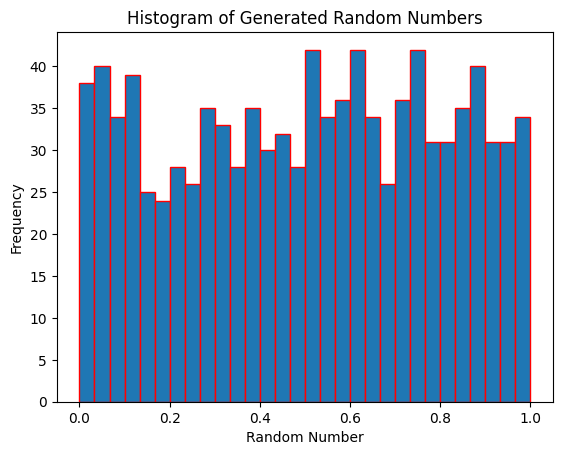

In [10]:
#(i) a= 65, m=1021

import matplotlib.pyplot as plt

# Assuming rnd_numbers is your list of random numbers
rnd_numbers = mlcgList(1000, (0,1), 65, 1021)

plt.hist(rnd_numbers, bins=30, edgecolor='red')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Random Numbers')
plt.show()



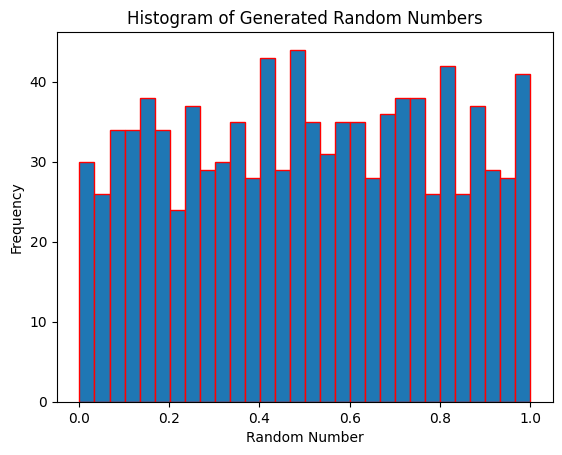

In [11]:
#(ii) a= 572, m=16381
rnd_numbers = mlcgList(1000, (0,1), 572, 16381)
plt.hist(rnd_numbers, bins=30, edgecolor='red')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Random Numbers')
plt.show()



# Question 2

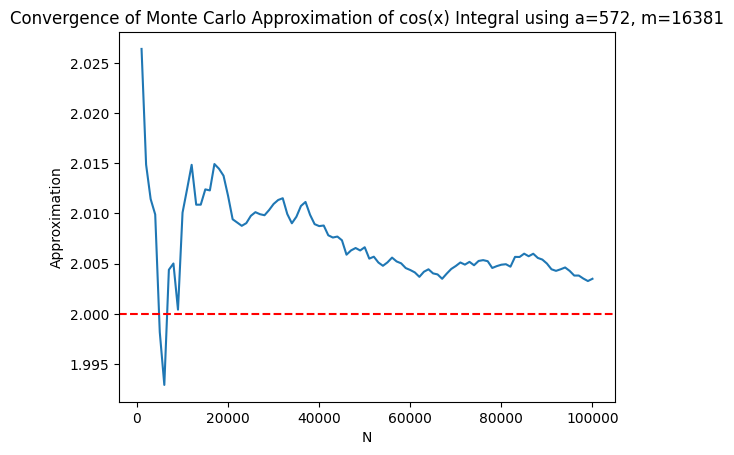

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate N random numbers using the MLCG listed in previous problem


# Step 2: Use Monte Carlo to approximate the integral
def monte_carlo_cos_integral(mlcg_numbers):
    total = 0
    for num in mlcg_numbers:
        x = np.pi * (num - 0.5)  # transform to [-π/2, π/2]
        total += np.cos(x)
    return total / len(mlcg_numbers) * np.pi  # scale by the range width

# Step 3: Repeat for different N
N_values = range(1000, 100001, 1000)
approximations = []
for N in N_values:
    mlcg_numbers = mlcgList(N,(0,1), 572, 16381)
    approximation = monte_carlo_cos_integral(mlcg_numbers)
    approximations.append(approximation)

# Step 4: Plot the convergence
plt.plot(N_values, approximations)
plt.xlabel('N')
plt.ylabel('Approximation')
plt.title('Convergence of Monte Carlo Approximation of cos(x) Integral using a=572, m=16381')
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

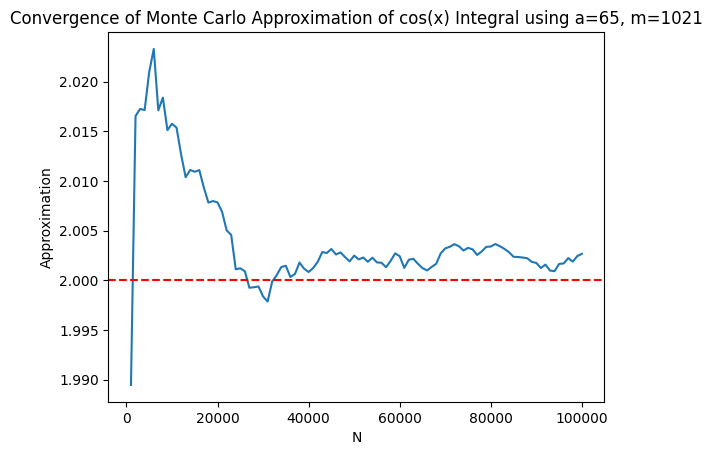

In [13]:
approximations = []
for N in N_values:
    mlcg_numbers = mlcgList(N,(0,1), 65, 1021)
    approximation = monte_carlo_cos_integral(mlcg_numbers)
    approximations.append(approximation)

# Step 4: Plot the convergence
plt.plot(N_values, approximations)
plt.xlabel('N')
plt.ylabel('Approximation')
plt.title('Convergence of Monte Carlo Approximation of cos(x) Integral using a=65, m=1021')
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

# Question 3

In [14]:
def target_distribution(x):
    return np.exp(-2 * x)

def inverse_cdf(y):
    return -np.log(1 - y) / 2

# Inverse Transform Method
def inverse_transform_sampling(n, generator):
    transformed_samples = []
    for _ in range(n):
        u = next(generator)
        x = inverse_cdf(u)
        transformed_samples.append(x)
    return transformed_samples

# Accept/Reject Method
def accept_reject_sampling(n, generator):
    samples = []
    M = 4  # Majorizing constant for the sampling distribution
    while len(samples) < n:
        x = next(generator)
        u = next(generator)
        if u <= target_distribution(x) / (M * (2 - x)):
            samples.append(x)
    return samples

num_samples = 3000

mlc_random_generator = mlc_generator(2**31, 1103515245)
samples_inverse_transform = inverse_transform_sampling(num_samples, mlc_random_generator)
samples_accept_reject = accept_reject_sampling(num_samples, mlc_random_generator)




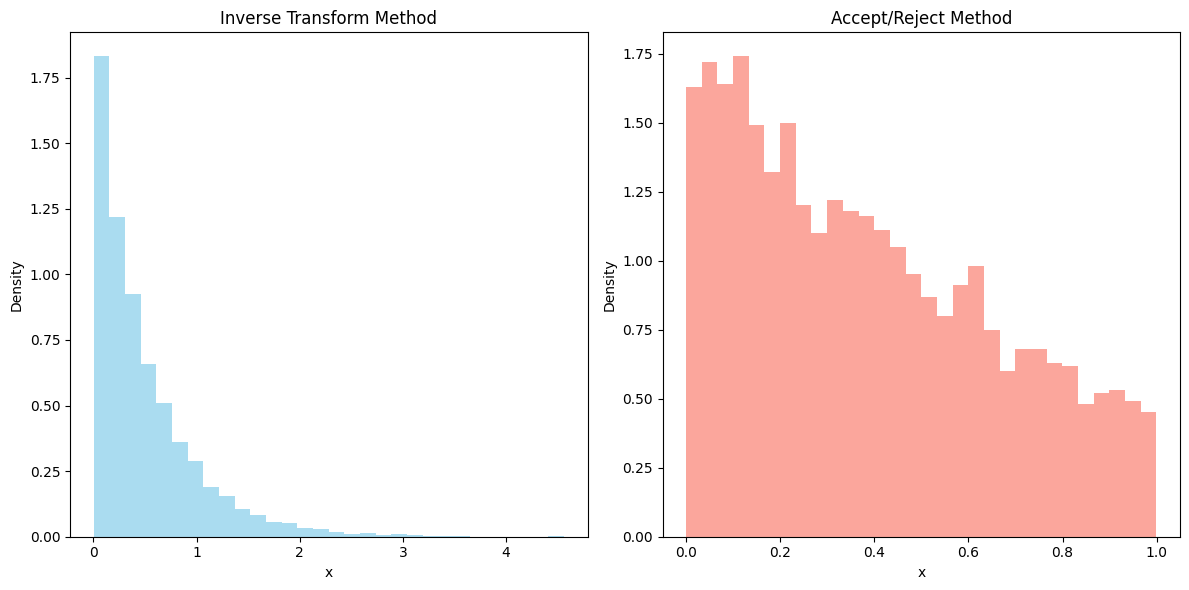

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_inverse_transform, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(samples_accept_reject, bins=30, density=True, color='salmon', alpha=0.7)
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# Question 4

In [16]:
from scipy.integrate import simps # For comparison
from tabulate import tabulate # For tabulating the results

# Function to be integrated
def f(x):
    return np.exp(-2*x) / (1 + x**2)

# Simpson's method 
def simpson_integration():
    x = np.linspace(0, 2, 1000)
    y = f(x)
    integral = simps(y, x)
    return integral

# importance sampling functions
def p1(x):
    return 0.5

def p2(x):
    return np.exp(-x)

def p3(x):
    return np.exp(-x/2) / (2 * (1 - np.exp(-1/2)))

# Monte Carlo integration function

def monte_carlo_integration(N, sampling_function, generator = mlc_random_generator):
    integral_sum = 0 
    for _ in range(N):
        x = next(generator) * 2  # Sample x from the range [0, 2] using the MLC generator
        weight = f(x) / sampling_function(x)
        integral_sum += weight
    return integral_sum / N

In [17]:
# Number of samples
N = 40000

integral_estimate_p1 = monte_carlo_integration(N, p1)
integral_estimate_p2 = monte_carlo_integration(N, p2)
integral_estimate_p3 = monte_carlo_integration(N, p3)

integral_simpson = simpson_integration()

# Tabulating the results
table_data = [
    ["p1(x)", integral_estimate_p1],
    ["p2(x)", integral_estimate_p2],
    ["p3(x)", integral_estimate_p3],
    ["Simpson's Method", integral_simpson]
]

print(tabulate(table_data, headers=["Sampling Function", "Monte Carlo Estimate"], tablefmt="grid"))

+---------------------+------------------------+
| Sampling Function   |   Monte Carlo Estimate |
+=====================+========================+
| p1(x)               |               0.397526 |
+---------------------+------------------------+
| p2(x)               |               0.303063 |
+---------------------+------------------------+
| p3(x)               |               0.191775 |
+---------------------+------------------------+
| Simpson's Method    |               0.397675 |
+---------------------+------------------------+


/tmp/ipykernel_151139/3777958439.py:12: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y, x)


**Efficiency of ( p1(x) )**: The proximity of the Monte Carlo approximation using ( p1(x) ) to the actual value indicates the effectiveness of ( p1(x) ) in minimizing variance. This suggests a close resemblance between ( p1(x) ) and the integrand ( f(x) ), leading to more precise estimates.

**Declining Approximations with ( p2(x) ) and ( p3(x) )**: A decrease in estimates using ( p2(x) ) and ( p3(x) ) and their divergence from the actual value signifies the ineffectiveness of these sampling functions. This could be attributed to a misalignment between ( p2(x) ) and ( p3(x) ) with ( f(x) ), resulting in increased variance.

**Variance Minimization**: Efficient sampling functions, such as ( p1(x) ), should decrease variance compared to uniform sampling. Hence, ( p1(x) ) is anticipated to provide the most accurate estimates, while ( p2(x) ) and ( p3(x) ) may exhibit growing deviation due to increased variance.